In [184]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [8]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [14]:
bank.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [11]:
bank.info()
#using .info function found that all the attributes are filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [20]:
bank.isnull().sum()
#np null items identified in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [19]:
bank.describe().transpose()
#using .describe function to understand the 5 point summary of the attributes

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* Using .describbe function identified there is a negative value under the Experience column, considering 52 values are added negative sign by mistake, will change that to absolute values
* Annual income of the users varies from 8 to 224, with median value being at 64

In [51]:
bank = bank.abs()

In [52]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A63E61F08>,
      dtype=object)

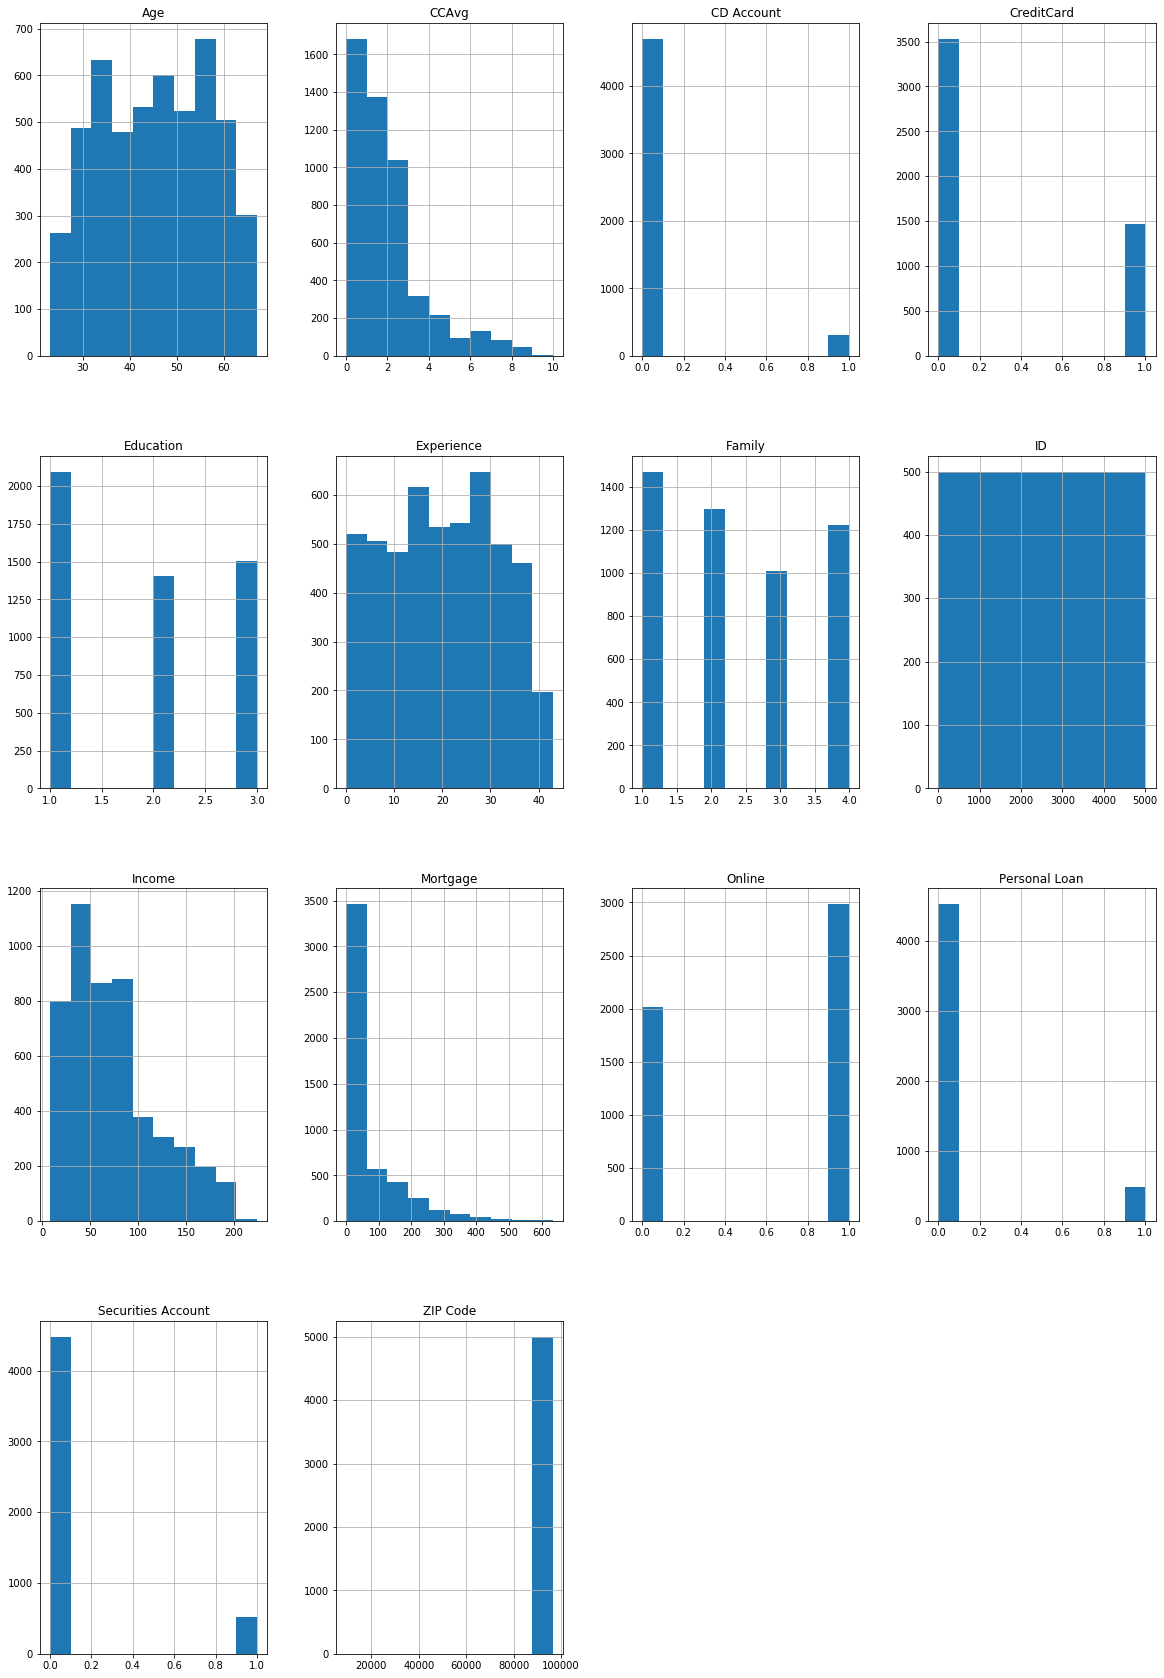

In [57]:
#using matplbotlib & seaborn for visualize the distribution of dataset
bank.hist(figsize=(20,30))

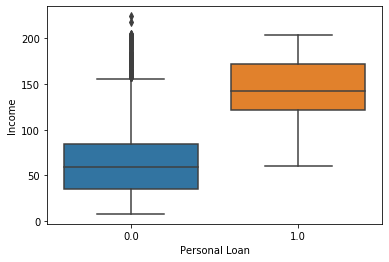

In [64]:
sns.boxplot(x="Personal Loan",y="Income",data=bank)

In [68]:
pd.crosstab(bank['Education'],bank['Personal Loan'])

Personal Loan,0.0,1.0
Education,,
1.0,2003,93
2.0,1221,182
3.0,1296,205


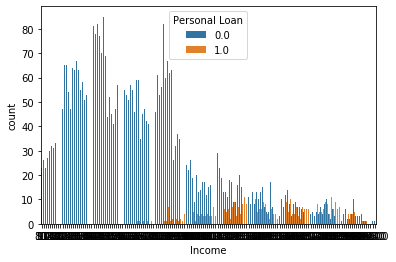

In [70]:
sns.countplot(x="Income",hue="Personal Loan",data=bank)

In [77]:
pd.pivot_table(bank,'Income',index=['Personal Loan'],columns=['Education'])

Education,1.0,2.0,3.0
Personal Loan,,,
0.0,83.204693,52.266994,53.175926
1.0,136.881720,145.131868,147.970732


<Figure size 1440x2160 with 0 Axes>

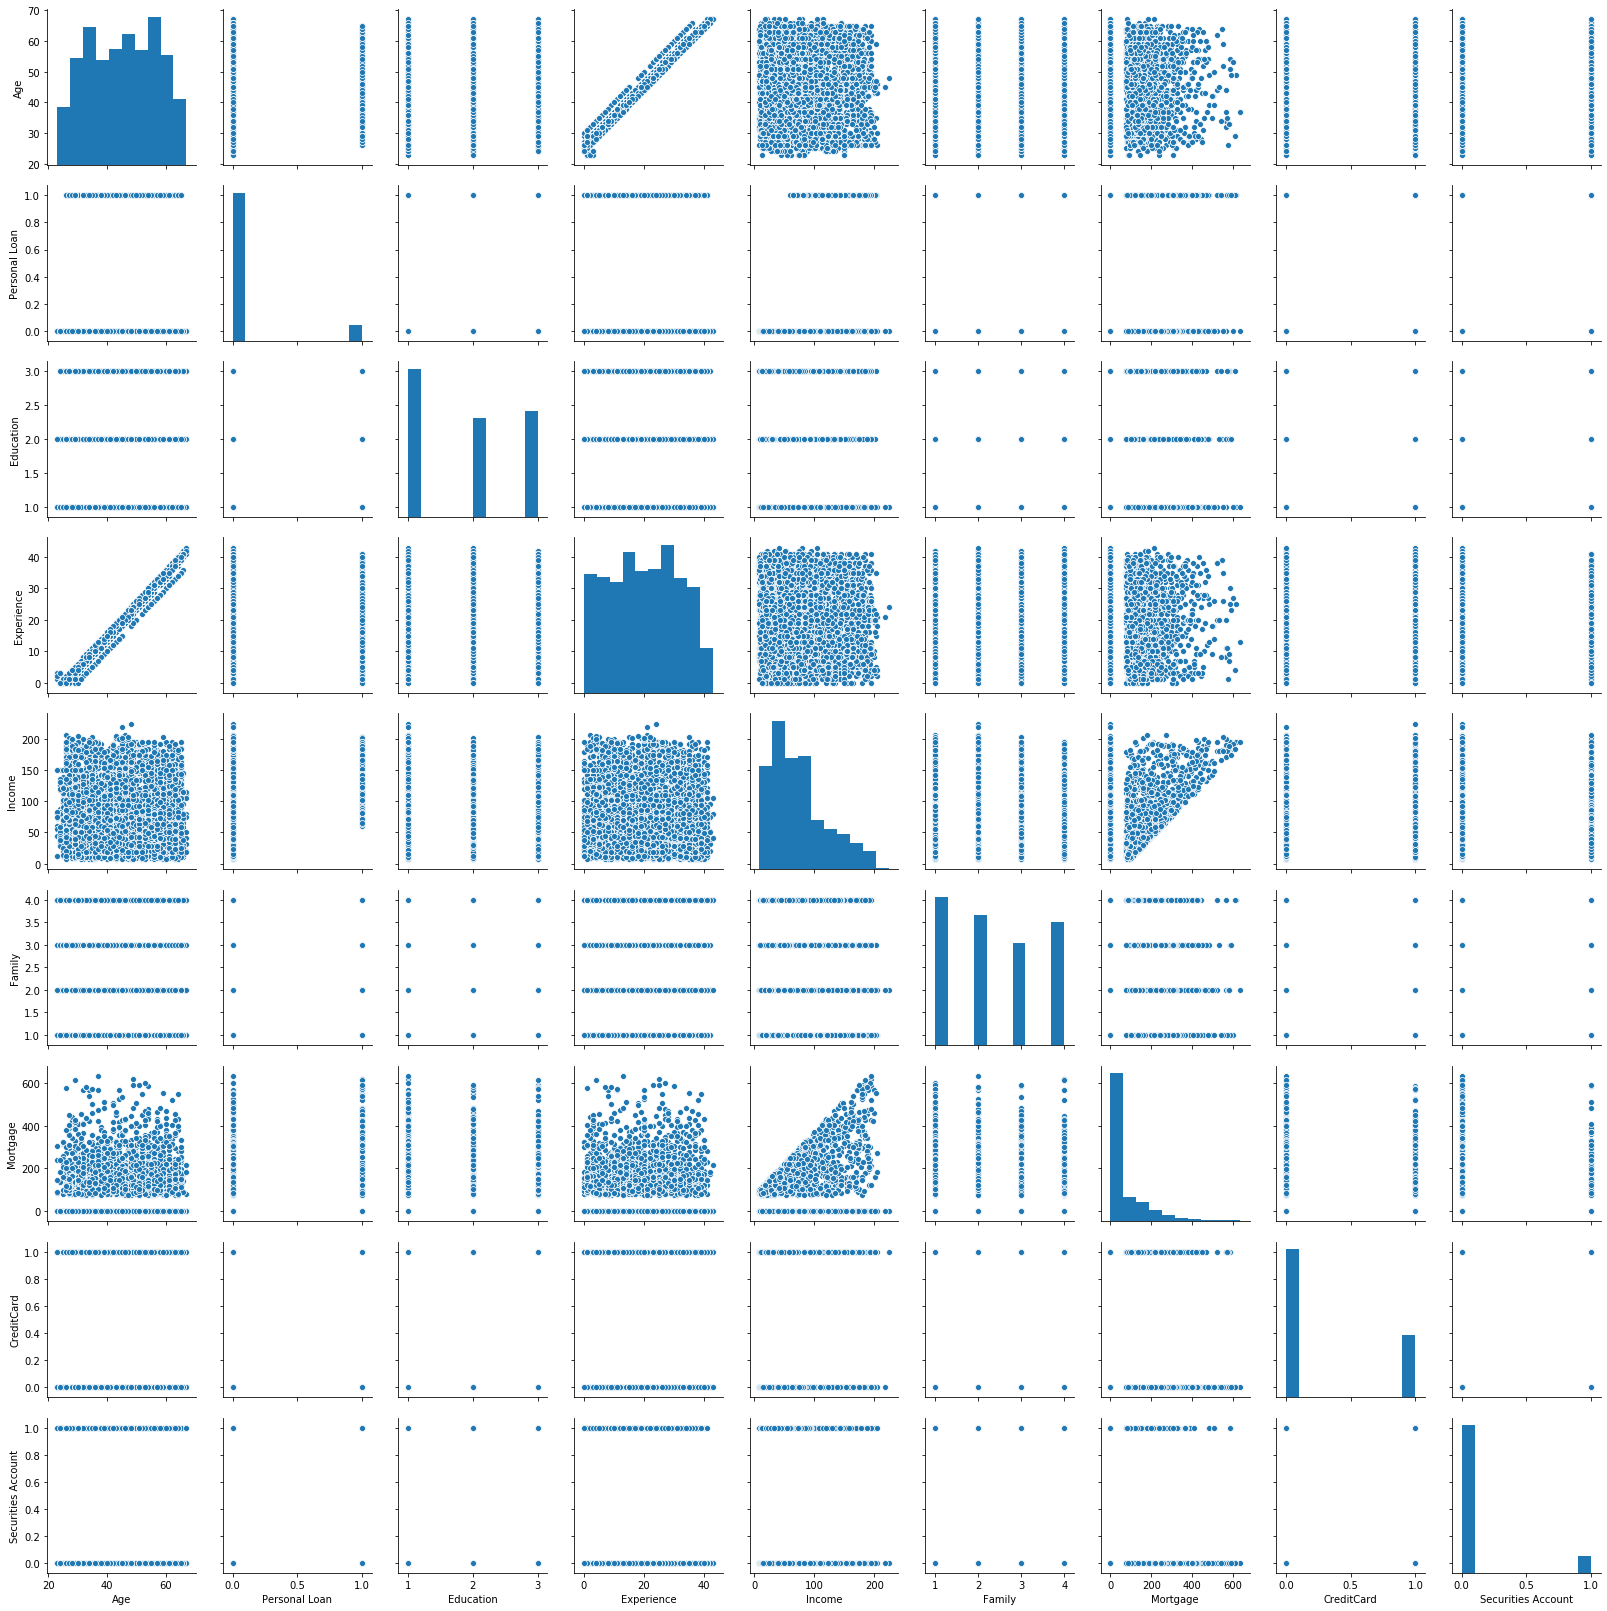

In [89]:
plt.figure(figsize=(20, 30))
sns.pairplot(bank, vars=['Age','Personal Loan','Education','Experience','Income','Family','Mortgage','CreditCard','Securities Account'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A19CC9A88>,
      dtype=object)

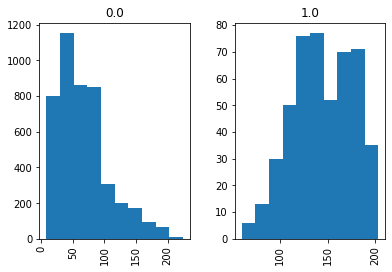

In [94]:
bank.hist(by='Personal Loan',column='Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A122C8CC8>,
      dtype=object)

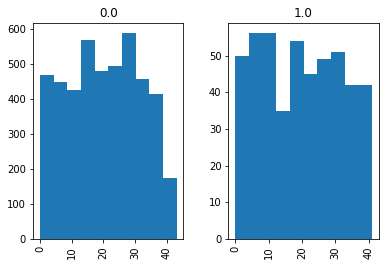

In [95]:
bank.hist(by='Personal Loan',column='Experience')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A12611348>,
      dtype=object)

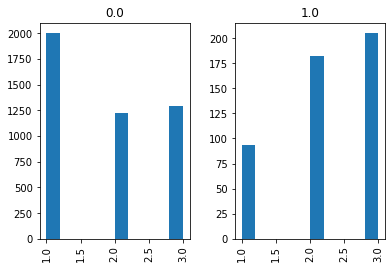

In [96]:
bank.hist(by='Personal Loan',column='Education')

In [107]:
corr = bank.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


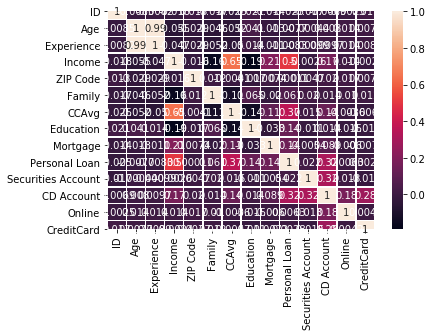

In [106]:
sns.heatmap(corr,annot=True,linewidth=0.5)

# Below are the inferences based on the above EDA:


*Age attribute is almost equally distributed
*CC avearage spending is right skewed, where it shows most of the customers spend mostly between 0-3000 on a monthly basis
*Education high frequency is shown for the undergraduates than the other 2 levels
* Income is right skewed where majority of the customers annual income are falling between 8 to 90
* When compared customers who has taken the loan vs. who did not against the income, we could see high amount of outlier customers in the salary from the customer group who did not taken the loan
* Customers whose education level Advanced/Professional has high possibility to apply for loan
* Average salary of the customers who has taken the loan and education is Advanced/Professional is 148 per annum
* Strong Positive coorelation is seen between age and experience as it should be
* Mortgage and Income is positively coorelated
* Customers with lower income (<180) success rate is more  compared to the higher income customers
* Identified 'Income' and 'Personal Acceptance' is coorelating merely, and 'Income and CC Avg' is coorelating as well


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A1415A588>]],
      dtype=object)

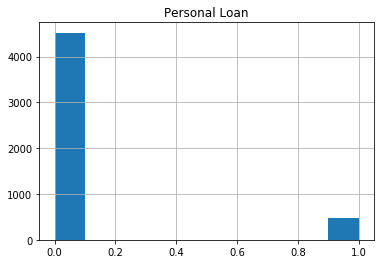

In [128]:
#Target Column distribution
bank.hist('Personal Loan')

In [139]:
bank['Personal Loan'].value_counts()

0.0    4520
1.0     480
Name: Personal Loan, dtype: int64

In [318]:
#Dropping 'Zip Code' and 'Online' attributes from the dataset since there is no coorelation from these attributes

In [ ]:
bank = bank.drop(columns="ZIP Code",axis=1)

In [300]:
bank = bank.drop(columns="Online",axis=1)

In [301]:
X = bank.drop(columns='Personal Loan',axis=1)
X.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
0,1.0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0
1,2.0,45.0,19.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0
2,3.0,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,1.0


#In total 480 out of 5000 customers have taken the personal loan from last campaign
#Conversion rate stands at 9.6%
#Potential existing customer database could be targeted for the better success rate in the upcoming campaign

In [302]:
Y = bank["Personal Loan"]
Y.tail()

4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: Personal Loan, dtype: float64

In [303]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [304]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=300, random_state=27)

print( "Train count : {} and Testcount : {}".format(X_train.shape[0], X_test.shape[0]))

Train count : 300 and Testcount : 4700


# Logistic Regression Model

In [305]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)

0.9378723404255319


C:\Users\sridhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [306]:
#Printing Confusion Matrix for the Logistic Rgression Model
print(metrics.confusion_matrix(Y_test, Y_predict))

[[4143  109]
 [ 183  265]]


In [307]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      4252
         1.0       0.71      0.59      0.64       448

    accuracy                           0.94      4700
   macro avg       0.83      0.78      0.81      4700
weighted avg       0.93      0.94      0.94      4700



# K-NN Model

In [308]:
KNN = KNeighborsClassifier(n_neighbors= 7, weights = 'uniform',metric='euclidean')
KNN.fit(X_train, Y_train)
Y_train_pred = KNN.predict(X_train)
Y_test_pred = KNN.predict(X_test)

In [309]:
accuracy_score_train = KNN.score(X_train, Y_train)
accuracy_score_test = KNN.score(X_test, Y_test)
print("train accuracy for k =5 is ", accuracy_score_train)
print("test accuracy for k =5 is ", accuracy_score_test)

train accuracy for k =5 is  0.9066666666666666
test accuracy for k =5 is  0.9036170212765957


In [310]:
KNN_Y_pred = KNN.predict(X_test)

In [311]:
print(classification_report(Y_test,KNN_Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4252
         1.0       0.41      0.03      0.05       448

    accuracy                           0.90      4700
   macro avg       0.66      0.51      0.50      4700
weighted avg       0.86      0.90      0.86      4700



In [312]:
#Printing Confusion Matrix for the KNN Model
print(metrics.confusion_matrix(Y_test, KNN_Y_pred))

[[4235   17]
 [ 436   12]]


# Naive Bayes

In [313]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [314]:
NB_Y_pred = NaiveBayes.predict(X_test)

In [315]:
NBmodel_score = NaiveBayes.score(X_test, Y_test)
print(NBmodel_score)

0.8997872340425532


In [316]:
print(classification_report(Y_test,NB_Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      4252
         1.0       0.48      0.70      0.57       448

    accuracy                           0.90      4700
   macro avg       0.72      0.81      0.76      4700
weighted avg       0.92      0.90      0.91      4700



In [317]:
#Printing Confusion Matrix for the NB Model
print(metrics.confusion_matrix(Y_test, NB_Y_pred))

[[3917  335]
 [ 136  312]]


# Reasoning For the Model: 

Give your reasoning on which is the best model in this case and why it performs better?

I would recommend 'Logistic Regression' model for this dataset. From the above analysis and model building we identified weighted average and accuray looks promising for 'Logistic Regression' model.

Since Logistic Regression is mostly used for Binary Dependent variables. Since the target variable which needs prediction of 'Yes or No' for the loan acceptance from the customer, we can go with this model.